##### Here we will follow various queries to show the sales compariosn on the Sales of beauty Products

Queries:-
1) Which Gender contributes more in the sales of the product
2) Which Gender Buyed more in values
3) Which Gender buyed more or less product in season of summer and winters
4) Which Customer Buyed most product in quantity and Quantity and which gender it belongs
5) Which Gender means fall in the purchasing higher amount product in values 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv('retail_sales_dataset.csv')

In [41]:
df=df[df['Product Category']=='Beauty']
print(df.head())

    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                1  2023-11-24     CUST001    Male   34           Beauty   
4                5  2023-05-06     CUST005    Male   30           Beauty   
5                6  2023-04-25     CUST006  Female   45           Beauty   
11              12  2023-10-30     CUST012    Male   35           Beauty   
20              21  2023-01-14     CUST021  Female   50           Beauty   

    Quantity  Price per Unit  Total Amount  
0          3              50           150  
4          2              50           100  
5          1              30            30  
11         3              25            75  
20         1             500           500  


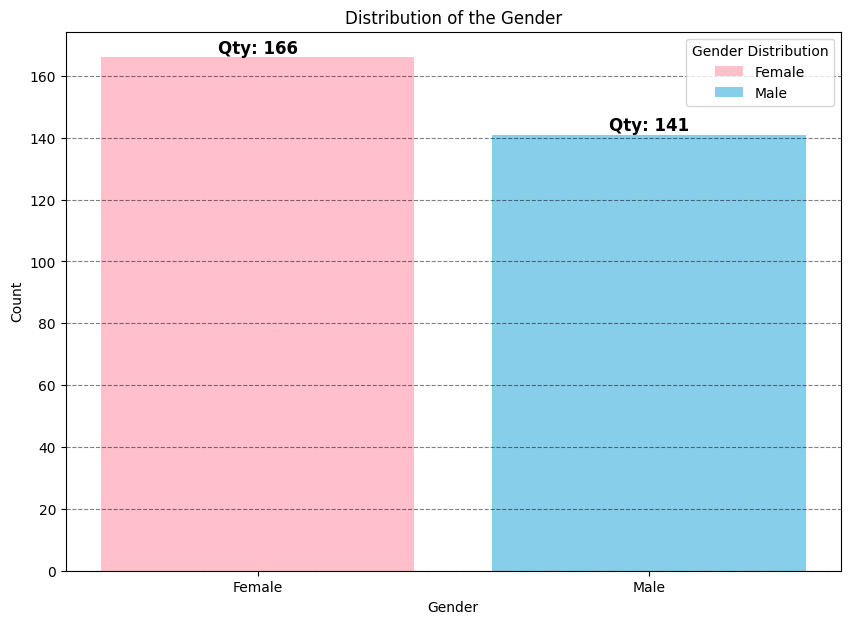

In [ ]:

# Count occurrences of each gender
Total_Number_of_gender_dis = df['Gender'].value_counts()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(Total_Number_of_gender_dis.index, Total_Number_of_gender_dis.values, color=['pink', 'skyblue'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of the Gender')

# Add legend dynamically
plt.legend(bars, ['Female', 'Male'], title='Gender Distribution', loc='upper right')

# Label each bar with values
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Qty: {int(bar.get_height())}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add grid for better visibility
plt.grid(axis='y', color='black', linestyle='--', alpha=0.5)

plt.show()


Gender
Female    418
Male      353
Name: Quantity, dtype: int64


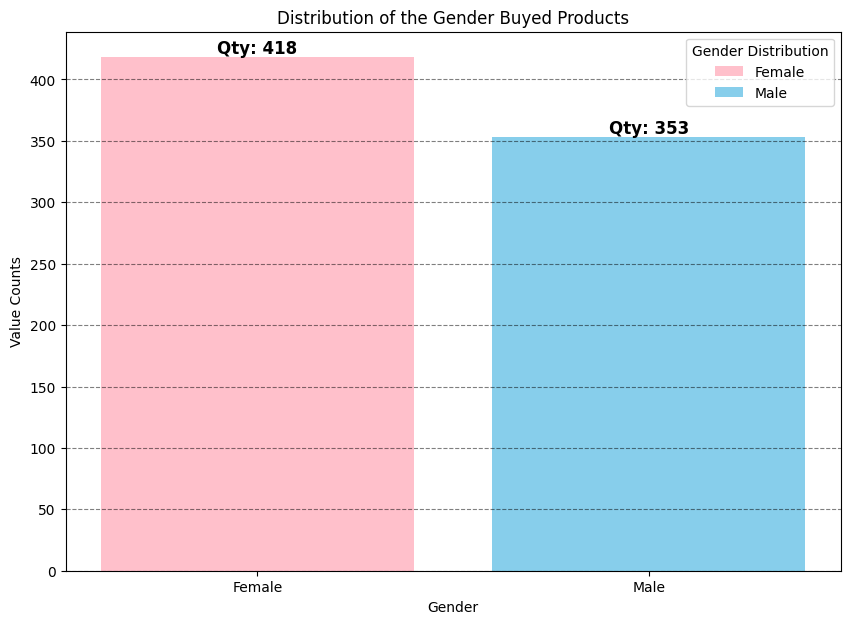

In [57]:
# Total Product Buyed in qunatity by each gender
Total_Number_of_gender_dis = df.groupby('Gender')['Quantity'].sum()
print(Total_Number_of_gender_dis)

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(Total_Number_of_gender_dis.index, Total_Number_of_gender_dis.values, color=['pink', 'skyblue'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Value Counts')
plt.xticks(rotation=0)
plt.title('Distribution of the Gender Buyed Products')

# Add legend dynamically
plt.legend(bars, ['Female', 'Male'], title='Gender Distribution', loc='upper right')

# Label each bar with values
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Qty: {int(bar.get_height())}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add grid for better visibility
plt.grid(axis='y', color='black', linestyle='--', alpha=0.5)

plt.show()


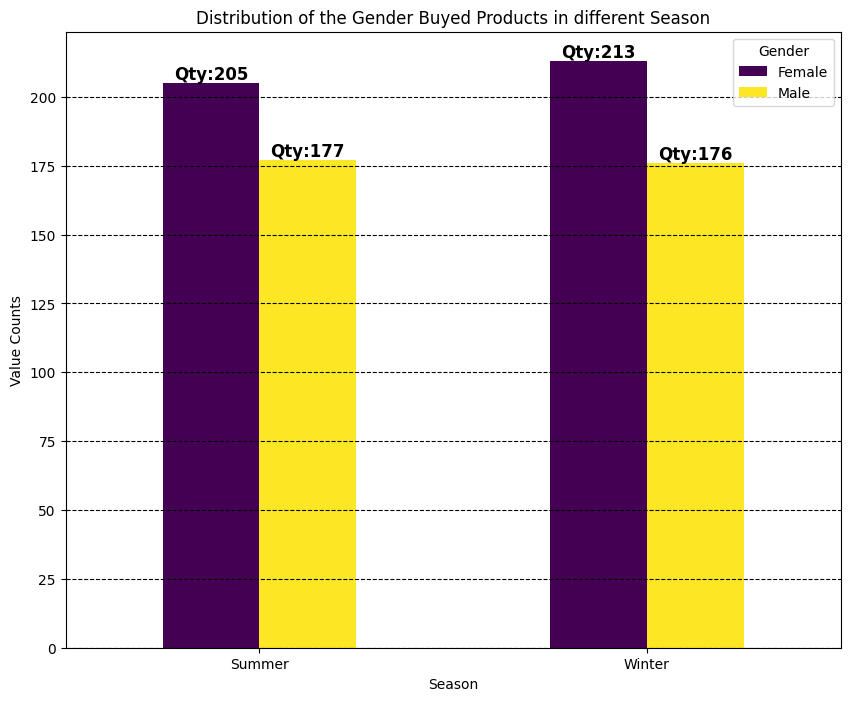

In [70]:

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].dt.month.apply(lambda x:'Summer' if x in [4,5,6,7,8,9] else 'Winter')
# print(df['Season'])

fig,ax=plt.subplots(figsize=(10,8))
seasonal_trends = df.groupby(['Season','Gender'])['Quantity'].sum().unstack()
# print(seasonal_trends)

# Plot the bar chart
bars = seasonal_trends.plot(kind='bar', colormap='viridis', ax=ax)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Value Counts')
plt.xticks(rotation=0)
plt.title('Distribution of the Gender Buyed Products in different Season')
plt.grid(axis='y',color='black',alpha =1,linestyle='--')

for bar in ax.patches:
  ax.text(bar.get_x()+bar.get_width()/2, 
          bar.get_height(),
          f'Qty:{int(bar.get_height())}',
          ha='center',fontsize=12,fontweight='bold',va='bottom')

plt.legend(title='Gender',loc='upper right')
plt.show()
